In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/example/example.jpg


In [2]:
!pip install transformers datasets huggingface_hub --upgrade --quiet --no-deps

In [4]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("HF_TOKEN")

In [5]:
from huggingface_hub import login
login(token=secret_value_0)

In [6]:
import torch
from torchvision import transforms, datasets
from timm import create_model
from torch import nn, optim
import os

# Configuración
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = create_model('vit_base_patch16_224', pretrained=True, num_classes=10).to(device)

# Data loaders
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
train_ds = datasets.CIFAR10('data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)

# Optimización y pérdida
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Entrenamiento
epochs = 5  # Puedes aumentar si quieres
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if (batch_idx + 1) % 100 == 0:
            print(f"[Época {epoch+1}/{epochs}] Batch {batch_idx+1} - Loss: {loss.item():.4f}")

    print(f"===> Fin de época {epoch+1}, Loss promedio: {running_loss / len(train_loader):.4f}")

# Guardar el modelo entrenado
os.makedirs("checkpoints", exist_ok=True)
torch.save(model.state_dict(), "checkpoints/vit_cifar10.pth")
print("✅ Modelo guardado en 'checkpoints/vit_cifar10.pth'")

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

100%|██████████| 170M/170M [00:06<00:00, 25.9MB/s] 


[Época 1/5] Batch 100 - Loss: 0.1367
[Época 1/5] Batch 200 - Loss: 0.1699
[Época 1/5] Batch 300 - Loss: 0.1222
[Época 1/5] Batch 400 - Loss: 0.4779
[Época 1/5] Batch 500 - Loss: 0.3539
[Época 1/5] Batch 600 - Loss: 0.4233
[Época 1/5] Batch 700 - Loss: 0.1744
[Época 1/5] Batch 800 - Loss: 0.1211
[Época 1/5] Batch 900 - Loss: 0.2319
[Época 1/5] Batch 1000 - Loss: 0.2123
[Época 1/5] Batch 1100 - Loss: 0.0835
[Época 1/5] Batch 1200 - Loss: 0.2557
[Época 1/5] Batch 1300 - Loss: 0.1833
[Época 1/5] Batch 1400 - Loss: 0.1501
[Época 1/5] Batch 1500 - Loss: 0.0341
===> Fin de época 1, Loss promedio: 0.2582
[Época 2/5] Batch 100 - Loss: 0.3795
[Época 2/5] Batch 200 - Loss: 0.0659
[Época 2/5] Batch 300 - Loss: 0.2317
[Época 2/5] Batch 400 - Loss: 0.0910
[Época 2/5] Batch 500 - Loss: 0.2012
[Época 2/5] Batch 600 - Loss: 0.2491
[Época 2/5] Batch 700 - Loss: 0.0859
[Época 2/5] Batch 800 - Loss: 0.0325
[Época 2/5] Batch 900 - Loss: 0.4023
[Época 2/5] Batch 1000 - Loss: 0.0250
[Época 2/5] Batch 1100 - 

In [7]:
model.load_state_dict(torch.load("checkpoints/vit_cifar10.pth"))
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

### 🧠 Paso a paso para predecir una imagen con un modelo ViT entrenado en CIFAR-10# 

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch

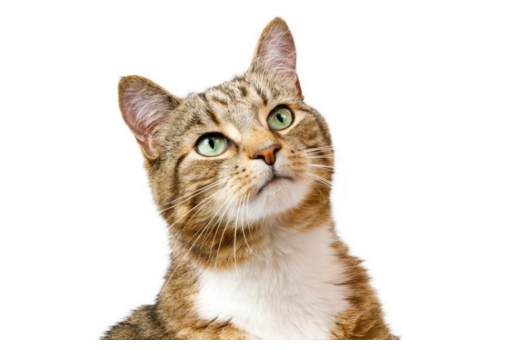

In [10]:
# Ruta de la imagen
image_path = "/kaggle/input/example/example.jpg"

# Cargar imagen
image = Image.open(image_path).convert("RGB")  # Asegura que tiene 3 canales (color)

# Visualizar la imagen
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
# Transformar imagen al formato esperado por el modelo
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Tamaño compatible con modelos como ResNet
    transforms.ToTensor()
])
input_tensor = transform(image).unsqueeze(0)  # Agrega dimensión de batch

In [15]:
# Detectar si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mover modelo al dispositivo (GPU si está disponible)
model = model.to(device)

# Mover el input_tensor al mismo dispositivo
input_tensor = input_tensor.to(device)

# Hacer predicción
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    predicted_class = output.argmax(dim=1).item()

In [16]:
# Clases de CIFAR-10
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

print("🔍 Predicción:", cifar10_classes[predicted_class])

🔍 Predicción: cat
